## pretrained models: Word2Vec, FastText, Glove

__사전학습모델 (이거 하나면 끝!)__

- [깃허브 ratsgo/embedding](https://github.com/ratsgo/embedding/releases/tag/v1.0.1)
  - 2019.07 [word-embeddings 다운로드](https://drive.google.com/file/d/1FeGIbSz2E1A63JZP_XIxnGaSRt7AhXFf/view)
  - [한국어 임베딩 튜토리얼](https://ratsgo.github.io/embedding/)

__그 밖에 사전학습모델 (Download)__

- [국민대 자연어처리-Word2Vec,FastText](http://nlp.kookmin.ac.kr/kcc/word2vec/)
  - Word2Vec 다운로드 가능: [word2vec-KCC150](http://203.246.112.71/kcc/word2vec/word2vec-KCC150.tar.gz)
  - FastText 는 다운로드 안됨
  - [임베딩 Demo](http://nlp.kookmin.ac.kr/kcc/word2vec/demo)
- [Glove-kor 100차원 다운로드](http://nlp.stanford.edu/data/glove.6B.zip)
  - 설명 페이지는 못찾았음
- [fasttext.cc Resources](https://fasttext.cc/docs/en/crawl-vectors.html)
  - FastText 다운로드 가능: [cc.ko.300.bin.gz](https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ko.300.bin.gz)
- [깃허브 Kyubyong/wordvectors](https://github.com/Kyubyong/wordvectors)
  - 2016.12 [Korean Word2Vec](https://drive.google.com/open?id=0B0ZXk88koS2KbDhXdWg1Q2RydlU)
  - 2017.02 [Korean FastText](https://www.dropbox.com/s/stt4y0zcp2c0iyb/ko.tar.gz?dl=0)

__참고문서__ 

- Word2Vec
  - [8) 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)](https://wikidocs.net/33793)
  - [자연어처리(NLP) 14일차 (Word2Vec 실습2)](https://omicro03.medium.com/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-14%EC%9D%BC%EC%B0%A8-word2vec-%EC%8B%A4%EC%8A%B52-8e518a358b6c)
- Glove
  - [자연어처리(NLP) 15일차 (GloVe)](https://omicro03.medium.com/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-15%EC%9D%BC%EC%B0%A8-glove-62ecdf424bbd)
- FastText
  - 블로그 [FastText Pre-trained 한국어 모델 사용기](https://inahjeon.dev/fasttext/)

In [ ]:
!pip install gensim==3.8.3 -U

import gensim
gensim.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'3.8.3'

In [ ]:
!cd ~
!pwd
# /content

/content


In [ ]:
#!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ko.300.bin.gz
# 4.2GB 다운로드: 오래 걸림(약 10분?)
#!gzip -d cc.ko.300.bin.gz
# 또는 !tar xvzf cc.ko.300.bin.gz -C /content/
# !ls -l

from gensim import models

# 50초 후 RAM 사용량 초과 --> 런타임 다운, 재시작 (포기!)
# 300차원 모델 7.24GB
ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin')

total 7073904
-rw-r--r-- 1 root root 7243669409 Jan 18  2019 cc.ko.300.bin
drwxr-xr-x 1 root root       4096 Jul 13 13:43 sample_data


In [ ]:
import gensim
print('gensim.version=', gensim.__version__)
# 3.8.3

# FastText Pre-trained 한국어 모델 사용기
# https://inahjeon.dev/fasttext/

from gensim import models

# 100차원 모델 : 2.44GB
ft_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/ko-embeddings"
ft_file = ft_path+'/fasttext-fb-ko-100.bin'
ft_model = models.fasttext.load_facebook_model(ft_file)

# 어마 무지하게 크다. Colab에서는 메모리 사용량 초과 오류 (로컬만 가능)
# ==> 로컬에서 100 차원으로 줄여서 다시 시도 ()
print( ft_model.wv.vectors.shape, end='\n\n' )
# (2000000, 300) ==> (2000000, 100)

# 페이스북 fasttext 모델:
# 조사 제거 등의 불용어 처리가 안되어 있어서 vocab 크기가 2백만개
# ==> 임베딩 사용시 공백 나누기 토크나이징만 사용하는게 적합

print( ft_model.wv.similar_by_word('파이썬', topn=7) )
# 300 차원 ==> [('Python', 0.5650616884231567), ('자이썬', 0.5624368786811829), ('레일스', 0.5598082542419434), 
# ('파이썬을', 0.5595802068710327), ('언어용', 0.528820276260376), ('파이썬의', 0.5250025391578674), 
# ('프로그래밍', 0.5225088596343994)]
# 100 차원 ==> [('자바스크립트', 0.7512364387512207), ('프로그래밍', 0.7282965183258057), ('텐서플로우', 0.7179376482963562), 
# ('레일스', 0.7145810723304749), ('제이쿼리', 0.7045015096664429), ('Python', 0.6941045522689819), 
# ('파이선', 0.6810979247093201)]

print( ft_model.wv.most_similar(positive=['한국', '도쿄'], negative=['서울']) )
# 300 차원 ==> [('일본', 0.683296799659729), ('미국', 0.4703075885772705), ('日本', 0.4648192822933197), 
# ('중국', 0.4453375041484833), ('대만', 0.43539512157440186), ('니케이', 0.4317743182182312), 
# ('왜국', 0.431355357170105), ('그로스상', 0.4311622977256775), ('にほん', 0.42761650681495667), 
# ('-한국', 0.41779330372810364)]

# 100 차원 ==> [('일본', 0.8235999345779419), ('대만', 0.6773608922958374), ('미국', 0.6414809226989746), 
# ('해외', 0.628483235836029), ('태국', 0.6256618499755859), ('외국', 0.6192373633384705), 
# ('호주', 0.6169720888137817), ('일본의', 0.6125977635383606), ('쌀국', 0.6123899817466736), 
# ('류큐', 0.6100170612335205)]


gensim.version= 3.8.3
(2000000, 100)

[('자바스크립트', 0.7512364387512207), ('프로그래밍', 0.7282965183258057), ('텐서플로우', 0.7179376482963562), ('레일스', 0.7145810723304749), ('제이쿼리', 0.7045015096664429), ('Python', 0.6941045522689819), ('파이선', 0.6810979247093201)]
[('일본', 0.8235999345779419), ('대만', 0.6773608922958374), ('미국', 0.6414809226989746), ('해외', 0.628483235836029), ('태국', 0.6256618499755859), ('외국', 0.6192373633384705), ('호주', 0.6169720888137817), ('일본의', 0.6125977635383606), ('쌀국', 0.6123899817466736), ('류큐', 0.6100170612335205)]


In [ ]:
!java --version
# openjdk 11.0.15 2022-04-19

!uname -a
# x86_64 GNU/Linux

!curl --version
# curl 7.58.0

openjdk 11.0.15 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
Linux 01a4517c692a 5.4.188+ #1 SMP Sun Apr 24 10:03:06 PDT 2022 x86_64 x86_64 x86_64 GNU/Linux
curl 7.58.0 (x86_64-pc-linux-gnu) libcurl/7.58.0 OpenSSL/1.1.1 zlib/1.2.11 libidn2/2.0.4 libpsl/0.19.1 (+libidn2/2.0.4) nghttp2/1.30.0 librtmp/2.3
Release-Date: 2018-01-24
Protocols: dict file ftp ftps gopher http https imap imaps ldap ldaps pop3 pop3s rtmp rtsp smb smbs smtp smtps telnet tftp 
Features: AsynchDNS IDN IPv6 Largefile GSS-API Kerberos SPNEGO NTLM NTLM_WB SSL libz TLS-SRP HTTP2 UnixSockets HTTPS-proxy PSL 


In [6]:
# MeCab 설치
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [85.6 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [817 kB]
Hit

In [7]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 6.5 MB/s 
     |████████████████████████████████| 453 kB 38.4 MB/s 


### KoNLPy 형태소 분석기 비교 

참고

- [한국어 형태소 분석기 체험 및 비교(Okt, Mecab, Komoran, Kkma)](https://soohee410.github.io/compare_tagger)

#### MeCab

- 잘게 자른다. 매우 빠르다(압도적). C++ 기반. 
- Elasticsearch 의 Nori 토크나이저도 mecab-ko-dic 사전을 사용함

```bash
# MeCab 사전 설치
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
```

#### Okt

- 스테밍 기능이 있다. 적당히 정교하다. 속도도 준수한편
- 트위터에서 만든 오픈소스 한국어 처리기 tweeter-korean-text 사전을 이어받아 만들어짐



In [8]:
# MeCab 테스트
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.morphs(u'영등포구청역에 있는 맛집 좀 알려주세요.'))
# ['영등포구청역', '에', '있', '는', '맛집', '좀', '알려', '주', '세요', '.']
print(mecab.nouns(u'우리나라에는 무릎 치료를 잘하는 정형외과가 없는가!'))
# ['우리', '나라', '무릎', '치료', '정형', '외과']
print(mecab.pos(u'자연주의~ 별로에요 ㅎㅎ ㅠㅠㅠㅠㅜ	(쇼핑[몰])은 어떤 곳인가? 알파벳, alphabet, 1234.'))
# [('자연주의', 'NNG'), ('쇼핑몰', 'NNG'), ('은', 'JX'), ('어떤', 'MM'), ('곳', 'NNG'), ('인가', 'VCP+EF'), ('?', 'SF')]

['영등포구청역', '에', '있', '는', '맛집', '좀', '알려', '주', '세요', '.']
['우리', '나라', '무릎', '치료', '정형', '외과']
[('자연주의', 'NNG'), ('~', 'SY'), ('별로', 'MAG'), ('에요', 'JX'), ('ㅎㅎ', 'IC'), ('ㅠㅠㅠㅠㅜ', 'UNKNOWN'), ('(', 'SSO'), ('쇼핑', 'NNG'), ('[', 'SSO'), ('몰', 'NNG'), (']', 'SSC'), (')', 'SSC'), ('은', 'JX'), ('어떤', 'MM'), ('곳', 'NNG'), ('인가', 'VCP+EF'), ('?', 'SF'), ('알파벳', 'NNG'), (',', 'SC'), ('alphabet', 'SL'), (',', 'SC'), ('1234', 'SN'), ('.', 'SF')]


In [ ]:
# Okt 테스트
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs(u'영등포구청역에 있는 맛집 좀 알려주세요.'))
# ['영등포', '구청', '역', '에', '있는', '맛집', '좀', '알려주세요', '.']
print(okt.nouns(u'우리나라에는 무릎 치료를 잘하는 정형외과가 없는가!'))
# ['우리나라', '무릎', '치료', '정형외과']
print(okt.pos(u'자연주의~ 별로에요 ㅎㅎ ㅠㅠㅠㅠㅜ (쇼핑[몰])은 어떤 곳인가?'))
# [('자연', 'Noun'), ('주의', 'Noun'), ('쇼핑몰', 'Noun'), ('은', 'Josa'), ('어떤', 'Adjective'), ('곳', 'Noun'), ('인가', 'Josa'), ('?', 'Punctuation')]

['영등포', '구청', '역', '에', '있는', '맛집', '좀', '알려주세요', '.']
['우리나라', '무릎', '치료', '정형외과']
[('자연', 'Noun'), ('주의', 'Noun'), ('~', 'Punctuation'), ('별로', 'Noun'), ('에요', 'Josa'), ('ㅎㅎ', 'KoreanParticle'), ('ㅠㅠㅠㅠㅜ', 'KoreanParticle'), ('(', 'Punctuation'), ('쇼핑', 'Noun'), ('[', 'Punctuation'), ('몰', 'Verb'), ('])', 'Punctuation'), ('은', 'Noun'), ('어떤', 'Adjective'), ('곳', 'Noun'), ('인가', 'Josa'), ('?', 'Punctuation')]


In [ ]:
texts = [
'생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 아까워요',
'디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져서 안쓰고 있어요',
'기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 이것도 적절할듯',
'튼튼하고 손목을 잘 받쳐주네요~ 그밖엔 별로에요^^'
]

# Mecab
# - 잘게 토크나이징 되어서 n-gram(2) 처리하여 임베딩 하면 적절할듯

print('--'*30+'\n== MeCab ==\n'+'--'*30)
for s in texts:
  t_all = mecab.morphs(s)
  print( t_all )
  t_oov = [ t for t in t_all if t not in ft_model.wv.vocab ]
  print(f'T_OOV({len(t_oov)}) ==>', t_oov )
  ngram_oov = [ t for t in [ t_all[i-1]+t_all[i] for i in range(1, len(t_all)) ] if t not in ft_model.wv.vocab ]
  print(f'NGRAM_OOV({len(ngram_oov)}) ==>', ngram_oov )
  print()

print('', end='\n\n')

# Okt
# - 비교적 단어를 잘 쪼개어 주어서 그냥 쓰는게 낫다. 
# - 다만 전치사 계열을 대부분 잘라내서 부정 의미가 훼손되는 점이 걱정됨 (학습에는 지장없고)
print('--'*30+'\n== Okt ==\n'+'--'*30)
for s in texts:
  t_all = okt.morphs(s)
  print( t_all )
  t_oov = [ t for t in t_all if t not in ft_model.wv.vocab ]
  print(f'T_OOV({len(t_oov)}) ==>', t_oov )
  ngram_oov = [ t for t in [ t_all[i-1]+t_all[i] for i in range(1, len(t_all)) ] if t not in ft_model.wv.vocab ]
  print(f'NGRAM_OOV({len(ngram_oov)}) ==>', ngram_oov )
  print()


------------------------------------------------------------
== MeCab ==
------------------------------------------------------------
['생각', '보다', '잘', '안', '돼요', '매지', '바른', '지', '하루', '밖에', '안', '됐', '는데', 'ㅠㅠ', '25', '천', '원', '가량', '주', '고', '사기', '너무', '아까', '워', '요']
T_OOV(0) ==> []
NGRAM_OOV(12) ==> ['보다잘', '잘안', '돼요매지', '매지바른', '밖에안', '안됐', '는데ㅠㅠ', 'ㅠㅠ25', '25천', '가량주', '사기너무', '너무아까']

['디자인', '은', '괜찮', '은데', '상품', '이', '금', '이', '가', '서', '교환', '했', '는데', '두', '번', '째', '받', '은', '상품', '도', '까져', '있', '고', '안쪽', '에', '금', '이', '가져서', '안', '쓰', '고', '있', '어요']
T_OOV(0) ==> []
NGRAM_OOV(15) ==> ['은괜찮', '은데상품', '서교환', '교환했', '는데두', '째받', '은상품', '도까져', '까져있', '고안쪽', '에금', '이가져서', '가져서안', '안쓰', '고있']

['기전', '에', '이', '제품', '말', '고', '이마트', '트', '레이더스', '에서', '만', '팔', '던', '프리미엄', '제품', '을', '사용', '했었', '습니다', '.', '이것', '도', '적절', '할', '듯']
T_OOV(0) ==> []
NGRAM_OOV(11) ==> ['제품말', '고이마트', '이마트트', '만팔', '던프리미엄', '프리미엄제품', '을사용', '사용했었', '습니다.', '.이것', '도적절']

['튼튼', '하', '고', '

### 데이터 불러오기

In [37]:
from google.colab import drive
drive.mount('/gdrive')

# 파일을 못찾을 경우, 이렇게 확인을 해야 함!!
import os
os.chdir("/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data")
!ls -l

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
total 29221
-rw------- 1 root root  188900 Jul  7 08:13 sample_submission.csv
-rw------- 1 root root  188886 Jul 23 13:16 submission.csv
-rw------- 1 root root 2679138 Jul  7 08:13 test.csv
-rw------- 1 root root 7842370 Jul 23 11:52 test_okt.csv
-rw------- 1 root root 2738015 Jul  7 08:13 train.csv
-rw------- 1 root root 8366728 Jul 24 10:57 train_mecab.csv
-rw------- 1 root root 7916377 Jul 24 10:43 train_okt.csv


In [38]:
import pandas as pd

data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

#csv 형식의 training 데이터를 로드합니다.
train_df = pd.read_csv(f'{data_path}/train.csv')
test_df = pd.read_csv(f'{data_path}/test.csv')

train_df.head()

,id,reviews,target
0,0,조아요 처음구입 싸게햇어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2
4,4,튼튼하고 손목을 잘 받쳐주네요~,5


In [39]:
# 한글 자모음 찾아보기
kor_df = train_df[train_df['reviews'].str.count(r'[ㄱ-ㅎ|ㅏ-ㅣ]+')>0]
print('자모음 ==>', len(kor_df))
print(kor_df['reviews'].head())

print('--'*30, end='\n\n')

# 영어 찾아보기
eng_df = train_df[train_df['reviews'].str.count(r'[a-zA-Z]+')>0]
print('영어 ==>', len(eng_df))
print(eng_df['reviews'].head())

print('--'*30, end='\n\n')

# 숫자 찾아보기
num_df = train_df[train_df['reviews'].str.count(r'[0-9]+')>0]
print('숫자 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 특수문자 찾아보기
spc_df = train_df[train_df['reviews'].str.count(r'[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]+')>0]
print('특수문자 ==>', len(spc_df))
print(spc_df['reviews'].head())

print('--'*30, end='\n\n')

# 웹주소 찾아보기 ==> 2
num_df = train_df[train_df['reviews'].str.count(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')>0]
print('웹주소 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 이메일 찾아보기 ==> 0
num_df = train_df[train_df['reviews'].str.count(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+')>0]
print('이메일 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 전화번호 찾아보기 ==> 4
num_df = train_df[train_df['reviews'].str.count(r'0[0-9]{1,2}[-]{0,1}[0-9]{3,4}[-]{0,1}[0-9]{4}')>0]
print('전화번호 ==>', len(num_df))
print(num_df['reviews'].head())

자모음 ==> 4584
1     생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...
2     디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...
15                            다른거는 다만족하는데 나사부분이ㅈ맘엥ㆍㄴ들어서
20                                     강추해요 너무 잘쓰고 있어ㅇᆢ
21    먼지가적다고하는데 전적은지모르겠어요. 극세사라고하던데..어느면이극세사인지도모르겠고요...
Name: reviews, dtype: object
------------------------------------------------------------

영어 ==> 537
105    물건이 잘못왔습니다. 제가주문한건 A3000u 인데 A3000ua 가왔스빈다. 일단...
154                                   px에있는 로카티 제질하고 달라요
189    일단 상품은 좋지 못해요 버튼도 확인 안되서 as전화하니 남직원이 불친절 하네요 돈...
198    분명 ad실내등 주문했는데 md실내등으로 왔네요 뜯고 작업할려니 뭐가안맞아서 보니 ...
244                        옵션추가해서 LED불들어오는걸로구매했는데 불량이네요.
Name: reviews, dtype: object
------------------------------------------------------------

숫자 ==> 2425
1     생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...
5     배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착...
39                    좋네요 성인6명이앉기딱일듯요 색상도 괜찮고 다리도 튼튼하네요
42    양념통5개 오일병5개 주문했는데 양념통 뚜껑하나가 스텐마감이 안되어있어서 검지

In [40]:
# 한글 자모음 제거
train_df['reviews_tmp'] = train_df['reviews'].replace(r'[ㄱ-ㅎ|ㅏ-ㅣ]+', '', regex=True)
# 나중에 제거하기 보다는 먼저 공백으로 치환해 형태소 분석 결과를 더 좋게 만들어 보고자 함!

# 웹주소 제거
train_df['reviews_tmp'] = train_df['reviews_tmp'].replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)
# 이메일 제거
train_df['reviews_tmp'] = train_df['reviews_tmp'].replace(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+', '', regex=True)
# 전화번호 제거
train_df['reviews_tmp'] = train_df['reviews_tmp'].replace(r'0[0-9]{1,2}[-]{0,1}[0-9]{3,4}[-]{0,1}[0-9]{4}', '', regex=True)

In [41]:
train_df['mrp_tokens'] = train_df['reviews_tmp'].apply(
    lambda s: ' '.join(mecab.morphs( s ))
    )

In [42]:
mecab.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NNB': '의존 명사',
 'NNBC': '단위를 나타내는 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'SC': '구분자 , · / :',
 'SE': '줄임표 …',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SSC': '닫는 괄호 ), ]',
 'SSO': '여는 괄호 (, [',
 'SY': '기타 기호',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [43]:
# MeCab 품사 태그 
# http://openuiz.blogspot.com/2016/07/mecab-ko-dic.html
# 조사: ('은', 'JX') (접속조사, JC) (감탄사,IC)
# 문장부호: ('?', 'SF'), (',', 'SC'), ('~', 'SY') SSO SSC
# 영어: ('alphabet', 'SL') (한자,SH)
# 숫자: ('1234', 'SN')

except_tags = ['UNKNOWN', 'IC','JC','JX', 'SH','SL','SN', 'SC','SE','SF','SO','SP','SSC','SSO','SW','SY']
pos_tagging = lambda tagger, s: [pos[0] for pos in tagger.pos(s) if pos[1] not in except_tags] 

train_df['pos_tokens'] = train_df['reviews_tmp'].apply(
    lambda s: ' '.join(pos_tagging(mecab, s))
    )

In [44]:
# 토큰수
train_df['mrp_tsize'] = train_df['mrp_tokens'].apply(lambda s: len(s.split()))
train_df['pos_tsize'] = train_df['pos_tokens'].apply(lambda s: len(s.split()))

# 공백 제외 글자수
import re
train_df['pos_csize'] = train_df['pos_tokens'].apply(lambda s: len(re.findall(r'\S',s)) )

# 토큰 1개짜리 리뷰 ==> 필터링
print(len(train_df[train_df['mrp_tsize']==1]), len(train_df[train_df['pos_tsize']==1]), len(train_df[train_df['pos_csize']==1]))
# pos_tokens 토큰수 2 이상?
train_df[(train_df['pos_csize']==1) | (train_df['pos_tsize']==1) & (train_df['mrp_tsize']==2)].head(20)

19 43 24


,id,reviews,target,reviews_tmp,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
878,878,굿 ㅂㄷ귿ㄱㅅㄱㄷㄱㅅㄱㅇㄱㅈㄷ븐ㅂㅅㄱㄷㄱㄴㄱㄷ긔닌ㄱ늑ㄷㄱㅅㄱㄷㄱㅅㅋㅌㄱㅅㄱㅌㄱㅅㄱㄷ...,5,굿 귿븐긔닌늑,굿 귿븐긔닌늑,굿,2,1,1
2894,2894,만적핮니다맞적핮니다만족핮니다,4,만적핮니다맞적핮니다만족핮니다,만적 핮니다맞적핮니다만족핮니다,만적,2,1,2
3184,3184,핳터ㅏㅠ ㅣㅍ터ㅐㅗ ㅏㅎ,1,핳터 터,핳터 터,터,2,1,1
4705,4705,별로에요 ㅠㅠ,2,별로에요,별로 에요,별로,2,1,2
6545,6545,이쁩니디당,5,이쁩니디당,이 쁩니디당,이,2,1,1
6636,6636,ㅇ로ㅗㅓㅓㅓㅓ,5,로,로,로,1,1,1
6780,6780,휴ㅠㅠㅠㅠㅜ,5,휴,휴,휴,1,1,1
8114,8114,별루에요 ㅜㅜ,2,별루에요,별루 에요,별루,2,1,2
9900,9900,카카오닙스조아요,5,카카오닙스조아요,카카오 닙스조아요,카카오,2,1,3
10832,10832,마더듭마더듭,2,마더듭마더듭,마더 듭마더듭,마더,2,1,2


In [45]:
stat_dict = train_df['pos_tsize'].value_counts().to_dict()
min_x, max_x = min(stat_dict.keys()), max(stat_dict.keys())

x_values = list(range(min_x, max_x+1))
y_values = [stat_dict.get(x,0) for x in x_values]
print(min_x, max_x, '=>',x_values)
print(y_values)
print()
train_df['pos_tsize'].describe()

0 77 => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
[28, 43, 175, 330, 651, 1057, 1382, 1570, 1546, 1436, 1275, 1138, 950, 940, 816, 705, 666, 623, 572, 514, 416, 493, 412, 438, 407, 406, 351, 373, 308, 315, 307, 313, 264, 245, 235, 227, 218, 190, 193, 168, 200, 151, 167, 162, 157, 131, 130, 122, 103, 98, 89, 80, 76, 78, 79, 69, 60, 50, 50, 38, 36, 33, 33, 25, 18, 19, 15, 10, 4, 6, 6, 5, 0, 1, 1, 1, 0, 1]



count    25000.000000
mean        18.117440
std         13.271701
min          0.000000
25%          8.000000
50%         13.000000
75%         25.000000
max         77.000000
Name: pos_tsize, dtype: float64

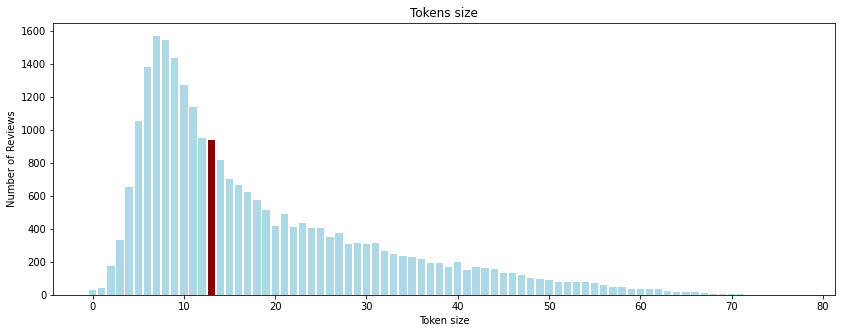

In [46]:
import matplotlib.pyplot as plt

# 중간값(13)만 빨간색
colors = [ 'lightblue' if x != 13 else 'darkred' for x in x_values ]

plt.figure(figsize = (14, 5))
plt.bar(x_values, y_values, color=colors)
plt.title("Tokens size")
plt.xlabel("Token size")
plt.ylabel("Number of Reviews")
plt.show()

In [47]:
# 한글자 pos_tokens 확인 (pos_tokens=20)
print('count 1-char:', len(train_df[ (train_df['pos_csize']==1) & ~(train_df['pos_tokens'].str.contains('굿')) ]), end='\n\n' )
train_df[ (train_df['pos_csize']==1) & ~(train_df['pos_tokens'].str.contains('굿')) ]

count 1-char: 20



,id,reviews,target,reviews_tmp,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
3184,3184,핳터ㅏㅠ ㅣㅍ터ㅐㅗ ㅏㅎ,1,핳터 터,핳터 터,터,2,1,1
6545,6545,이쁩니디당,5,이쁩니디당,이 쁩니디당,이,2,1,1
6636,6636,ㅇ로ㅗㅓㅓㅓㅓ,5,로,로,로,1,1,1
6780,6780,휴ㅠㅠㅠㅠㅜ,5,휴,휴,휴,1,1,1
11322,11322,ㄷ근 ㄴㄷㆍㅊ,5,근 ㆍ,근 ㆍ,근,2,1,1
12077,12077,부ㄹㄹㄹ만,2,부만,부 만,부,2,1,1
13516,13516,ㅇㄻ앎 ㄴㅇㄷ,2,앎,앎,앎,1,1,1
14576,14576,ㅈㄱㅈㄴㅈㄴㅈㄴㅈ ㅅㄷㅅㄷㄴㅈㄴㅈㄴ.ㄴㅈㄴㅈㄴㅈㅅㅈㅅㄷㅅㄷㅅㄷㅅㄷㅅㄷㄴ지ᄌᆞㅈㄷㅎㄷ...,2,".지ᄌᆞ치....,",". 지 ᄌᆞ치 . ...,",지,5,1,1
14779,14779,이뻐이뻐조아조아조아,5,이뻐이뻐조아조아조아,이 뻐이뻐조아조아조아,이,2,1,1
14938,14938,ㄴㄱㅅㅂㄴㄱㄴ거ㆍㄱㄷㅂㄷㅅㅈㅅㄷㅅㄷㄱㄷㄱㄴㅂㄴㅂㄷㅅ ㄷㄱㄴㄱㄷㄴㄷㄹㄱㆍㅂㆍ기ㅏㄱㆍㅂ...,4,거ㆍ ㆍㆍ기ㆍ스는늣극ㆍ느늑ㆍㆍ스슥ㆍ근,거 ㆍ ㆍㆍ기ㆍ스는늣극ㆍ느늑ㆍㆍ스슥ㆍ근,거,3,1,1


In [48]:
import numpy as np

# 공백을 NaN 으로
train_df = train_df.replace(r'^\s*$', np.NaN, regex=True)
# NaN 확인 (pos_tokens=28)
print('count NaN:', train_df.isna().sum(), end='\n\n' )
# NaN 포함열 삭제
train_df = train_df.dropna()

# 한글자 pos_tokens 확인 (pos_tokens=20)
print('count 1-char:', len(train_df[ (train_df['pos_csize']==1) & ~(train_df['pos_tokens'].str.contains('굿')) ]), end='\n\n' )
# 한글자 pos_tokens 포함열 삭제 (단, '굿' 제외)
train_df = train_df.drop( train_df[ (train_df['pos_csize']==1) & ~(train_df['pos_tokens'].str.contains('굿')) ].index )

# ==> 모두 48행 제거

count NaN: id              0
reviews         0
target          0
reviews_tmp     0
mrp_tokens      0
pos_tokens     28
mrp_tsize       0
pos_tsize       0
pos_csize       0
dtype: int64

count 1-char: 20



In [49]:
# 불필요한 컬럼 제거
train_df = train_df.drop(['reviews_tmp'], axis='columns')

In [50]:
# 24952 rows × 8 columns
train_df

,id,reviews,target,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
0,0,조아요 처음구입 싸게햇어요,2,조아 요 처음 구입 싸 게 햇 어요,조아 요 처음 구입 싸 게 햇 어요,8,8,12
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1,생각 보다 잘 안 돼요 매지 바른 지 하루 밖에 안 됐 는데 25 천 원 가량 주 ...,생각 보다 잘 안 돼요 매지 바른 지 하루 안 됐 는데 천 원 가량 주 고 사기 너...,23,21,33
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인 은 괜찮 은데 상품 이 금 이 가 서 교환 했 는데 두 번 째 받 은 상품 ...,디자인 괜찮 은데 상품 이 금 이 가 서 교환 했 는데 두 번 째 받 은 상품 까져...,43,40,61
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전 에 이 제품 말 고 이마트 트 레이더스 에서 만 팔 던 프리미엄 제품 을 사용...,기전 에 이 제품 말 고 이마트 트 레이더스 에서 팔 던 프리미엄 제품 을 사용 했...,73,66,99
4,4,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼 하 고 손목 을 잘 받쳐 주 네요 ~,튼튼 하 고 손목 을 잘 받쳐 주 네요,10,9,13
...,...,...,...,...,...,...,...,...
24995,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5,일단 향 이 너무너무 좋 은데 지속력 만 좋 다면 좋 겠 지만 . . 워낙 저렴 해...,일단 향 이 너무너무 좋 은데 지속력 좋 다면 좋 겠 지만 워낙 저렴 해 그래도 좋...,22,19,32
24996,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2,동일 한 업체 에서 발송 하 고 한 상자 로 배송 되 었 는데 택배 비 는 이중 처...,동일 한 업체 에서 발송 하 고 한 상자 로 배송 되 었 는데 택배 비 는 이중 처...,23,22,34
24997,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4,향 이 좋 아요 ! ! 다른 향도 시켜 보 고 싶 어요,향 이 좋 아요 다른 향도 시켜 보 고 싶 어요,13,11,16
24998,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2,펼쳐 보 니 끝 부분 쯤 에 50 cm 정도 찟 어 져 있 습니다 날짜 관계 로 구...,펼쳐 보 니 끝 부분 쯤 에 정도 져 있 습니다 날짜 관계 로 구 냥 사용 합니다,22,18,28


In [51]:
import pandas as pd

data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 전처리 된 csv 저장
# - index=False 안하면, `unnamed:0` 컬럼 생성됨
train_df.to_csv(data_path+'/train_mecab.csv', index=False, encoding='utf-8')

#### 2) TEST 데이터 전처리

TRAIN 데이터와 동일 작업 수행

In [52]:
test_df
# 25000 rows × 2 columns

,id,reviews
0,0,채소가 약간 시들어 있어요
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요
...,...,...
24995,24995,사용해보니 좋아요~^^
24996,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..
24997,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...
24998,24998,역시 로네펠트!! 좋아요.


In [53]:
# 한글 자모음 제거
test_df['reviews_tmp'] = test_df['reviews'].replace(r'[ㄱ-ㅎ|ㅏ-ㅣ]+', '', regex=True)

# 웹주소 제거
test_df['reviews_tmp'] = test_df['reviews_tmp'].replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)
# 이메일 제거
test_df['reviews_tmp'] = test_df['reviews_tmp'].replace(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+', '', regex=True)
# 전화번호 제거
test_df['reviews_tmp'] = test_df['reviews_tmp'].replace(r'0[0-9]{1,2}[-]{0,1}[0-9]{3,4}[-]{0,1}[0-9]{4}', '', regex=True)

# Okt 토크나이징
test_df['mrp_tokens'] = test_df['reviews_tmp'].apply(
    lambda s: ' '.join(mecab.morphs( s ))
    )
test_df['pos_tokens'] = test_df['reviews_tmp'].apply(
    lambda s: ' '.join(pos_tagging(mecab, s))
    )

# 토큰수
test_df['mrp_tsize'] = test_df['mrp_tokens'].apply(lambda s: len(s.split()))
test_df['pos_tsize'] = test_df['pos_tokens'].apply(lambda s: len(s.split()))

# 공백 제외 글자수
import re
test_df['pos_csize'] = test_df['pos_tokens'].apply(lambda s: len(re.findall(r'\S',s)) )

# 공백을 NaN 으로
test_df = test_df.replace(r'^\s*$', np.NaN, regex=True)
# NaN 확인 (pos_tokens=18)
print('count NaN:', test_df.isna().sum(), end='\n\n' )
# NaN 포함열 삭제
test_df = test_df.dropna()

# 한글자 pos_tokens 확인 (pos_tokens=21)
print('count 1-char:', len(test_df[ (test_df['pos_csize']==1) & ~(test_df['pos_tokens'].str.contains('굿')) ]), end='\n\n' )
# 한글자 pos_tokens 포함열 삭제 (단, '굿' 제외)
test_df = test_df.drop( test_df[ (test_df['pos_csize']==1) & ~(test_df['pos_tokens'].str.contains('굿')) ].index )

# ==> 모두 39행 제거


# 불필요한 컬럼 제거
test_df = test_df.drop(['reviews_tmp'], axis='columns')

# 24961 rows × 8 columns
test_df

count NaN: id              0
reviews         0
reviews_tmp     0
mrp_tokens      0
pos_tokens     18
mrp_tsize       0
pos_tsize       0
pos_csize       0
dtype: int64

count 1-char: 21



,id,reviews,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
0,0,채소가 약간 시들어 있어요,채소 가 약간 시들 어 있 어요,채소 가 약간 시들 어 있 어요,7,7,11
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍 고 단단 한 분 들 써도 소용없 어요 이 테이프 물렁 거리 고 힘 이 없...,발톱 두껍 고 단단 한 분 들 써도 소용없 어요 이 테이프 물렁 거리 고 힘 이 없...,38,36,56
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋 네요 입 어 보 고 시원 하 면 또 살 게요,부들부들 좋 네요 입 어 보 고 시원 하 면 또 살 게요,13,13,19
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 1 . 8 골드 주라 니깐 파란 개 오 네 회사 전화 걸어도 받 지 도 않 고...,이런 골드 주라 니깐 파란 개 오 네 회사 전화 걸어도 받 지 않 고 머 하 자는 거 임,25,20,30
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수 도 없이 보내 구 불량 배송 비 5000 원 청구 하 네요 완전 별 로 별 하...,검수 없이 보내 구 불량 배송 비 원 청구 하 네요 완전 별 로 별 하나 아까 워 요,22,19,29
...,...,...,...,...,...,...,...
24995,24995,사용해보니 좋아요~^^,사용 해 보 니 좋 아요 ~^^,사용 해 보 니 좋 아요,7,6,8
24996,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..,저렴 한 가격 에 . 질 좋 고 . 핏 좋 고 . 너무 . 이쁘 게 . 입 고 다녀...,저렴 한 가격 에 질 좋 고 핏 좋 고 너무 이쁘 게 입 고 다녀요,23,16,22
24997,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...,세트 상품 이 라고 써 있 어서 그런 줄 알 고 구매 했 더니 단 품 이 었 네요 ...,세트 상품 이 라고 써 있 어서 그런 줄 알 고 구매 했 더니 단 품 이 었 네요 ...,56,53,76
24998,24998,역시 로네펠트!! 좋아요.,역시 로네 펠트 ! ! 좋 아요 .,역시 로네 펠트 좋 아요,8,5,9


In [54]:
import pandas as pd

data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 전처리 된 csv 저장
# - index=False 안하면, `unnamed:0` 컬럼 생성됨
test_df.to_csv(data_path+'/test_mecab.csv', index=False, encoding='utf-8')

## MeCab 토크나이징으로 회귀모델 돌려보기

In [55]:
import pandas as pd

# data_path = '~/Workspaces/keras/dacon-shopping-mall/review_data'
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# MeCab 토크나이징
# ==> NaN, 한글자 제거 (rows=24966)
file_path = f'{data_path}/train_mecab.csv'

## Pickle 로딩
train_df = pd.read_csv(file_path)
# train_df = train_df.drop(['Unnamed: 0'], axis='columns')
print(train_df.shape)

train_df
# 24952 rows × 8 columns

(24952, 8)


,id,reviews,target,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
0,0,조아요 처음구입 싸게햇어요,2,조아 요 처음 구입 싸 게 햇 어요,조아 요 처음 구입 싸 게 햇 어요,8,8,12
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1,생각 보다 잘 안 돼요 매지 바른 지 하루 밖에 안 됐 는데 25 천 원 가량 주 ...,생각 보다 잘 안 돼요 매지 바른 지 하루 안 됐 는데 천 원 가량 주 고 사기 너...,23,21,33
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인 은 괜찮 은데 상품 이 금 이 가 서 교환 했 는데 두 번 째 받 은 상품 ...,디자인 괜찮 은데 상품 이 금 이 가 서 교환 했 는데 두 번 째 받 은 상품 까져...,43,40,61
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전 에 이 제품 말 고 이마트 트 레이더스 에서 만 팔 던 프리미엄 제품 을 사용...,기전 에 이 제품 말 고 이마트 트 레이더스 에서 팔 던 프리미엄 제품 을 사용 했...,73,66,99
4,4,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼 하 고 손목 을 잘 받쳐 주 네요 ~,튼튼 하 고 손목 을 잘 받쳐 주 네요,10,9,13
...,...,...,...,...,...,...,...,...
24947,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5,일단 향 이 너무너무 좋 은데 지속력 만 좋 다면 좋 겠 지만 . . 워낙 저렴 해...,일단 향 이 너무너무 좋 은데 지속력 좋 다면 좋 겠 지만 워낙 저렴 해 그래도 좋...,22,19,32
24948,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2,동일 한 업체 에서 발송 하 고 한 상자 로 배송 되 었 는데 택배 비 는 이중 처...,동일 한 업체 에서 발송 하 고 한 상자 로 배송 되 었 는데 택배 비 는 이중 처...,23,22,34
24949,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4,향 이 좋 아요 ! ! 다른 향도 시켜 보 고 싶 어요,향 이 좋 아요 다른 향도 시켜 보 고 싶 어요,13,11,16
24950,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2,펼쳐 보 니 끝 부분 쯤 에 50 cm 정도 찟 어 져 있 습니다 날짜 관계 로 구...,펼쳐 보 니 끝 부분 쯤 에 정도 져 있 습니다 날짜 관계 로 구 냥 사용 합니다,22,18,28


In [56]:
from sklearn.model_selection import train_test_split

data = train_df
X_train, X_test, y_train, y_test = train_test_split(
    data[ ['reviews','pos_tokens'] ], 
#     data['pos_tokens'], 
    data['target'], 
    test_size=0.2, 
    random_state=42, 
#     shuffle=True, 
    stratify=data['target']   # 분리하기 이전의 클래스 비율을 분리하고 나서도 유지하기 위해 설정해야 하는 값
)

# 크기를 확인합니다.
print( 'train 데이터 셋 모양 :', X_train.shape, y_train.shape)
print( 'test 데이터 셋 모양 :', X_test.shape, y_test.shape)
# train 데이터 셋 모양 : (19961, 2) (19961,)
# test 데이터 셋 모양 : (4991, 2) (4991,)

train 데이터 셋 모양 : (19961, 2) (19961,)
test 데이터 셋 모양 : (4991, 2) (4991,)


### unigram 벡터화 (n-gram=1)

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 벡터화 

# BEST: acc=0.614 (min_df=2, vocab=6862)
vectorizer = TfidfVectorizer(min_df=2)
# min_df=1 => 13022, acc=0.613
# min_df=2 =>  6862, acc=0.614
# min_df=3 =>  4939, acc=0.613

vectorizer.fit(X_train['pos_tokens'])  # vocab_size = 28550

X_train_vec = vectorizer.transform(X_train['pos_tokens'])
X_test_vec = vectorizer.transform(X_test['pos_tokens'])
print('TfidfVectorizer Shape:', X_train_vec.shape, X_test_vec.shape)
print()

# 변환이 잘 되었나 확인합니다.
print(X_train_vec[10])
print()

# inverse_transform을 사용해 원문을 확인할 수 있습니다.
print(X_train.iloc[10,1])
vectorizer.inverse_transform(X_train_vec[10])

TfidfVectorizer Shape: (19961, 6862) (4991, 6862)

  (0, 6470)	0.4183985072281115
  (0, 4415)	0.4351649938733928
  (0, 4209)	0.1525843464067306
  (0, 4148)	0.5851193583524325
  (0, 2475)	0.5195454464908015

예쁜 핑크 로 왔 어요 양치질 잘 할 수 있 길 바래 요


[array(['핑크', '예쁜', '어요', '양치질', '바래'], dtype='<U6')]

In [97]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
# lr_clf = LogisticRegression(solver='lbfgs', max_iter=500, random_state=42)   # 0.612
lr_clf = LogisticRegression(solver='liblinear', max_iter=500, random_state=42) # 0.614
lr_clf.fit(X_train_vec, y_train)
pred = lr_clf.predict(X_test_vec)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(metrics.accuracy_score(y_test, pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.614


### bigram 벡터화 (n-gram=2)

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 벡터화 

# BEST: acc=0.625 (min_df=3, vocab=12430)
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3)
# min_df=1 => 108423, acc=0.624
# min_df=2 =>  22308, acc=0.623
# min_df=3 =>  12430, acc=0.625
# min_df=4 =>   8722, acc=0.623

# BEST: acc=0.578 (min_df=1, vocab=95401)
# vectorizer = TfidfVectorizer(ngram_range=(2,2), min_df=4)
# min_df=1 =>  95401, acc=0.578
# min_df=2 =>  15446, acc=0.572
# min_df=3 =>   7491, acc=0.567
# min_df=4 =>   4770, acc=0.560

# BEST: acc=0.624 (min_df=3, vocab=14115)
# vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=4)
# min_df=1 => 236163, acc=0.619
# min_df=2 =>  27172, acc=0.620
# min_df=3 =>  14115, acc=0.624
# min_df=4 =>   9653, acc=0.623

# BEST: acc=0.570 (min_df=1, vocab=223141)
# vectorizer = TfidfVectorizer(ngram_range=(2,3), min_df=4)
# min_df=1 => 223141, acc=0.570
# min_df=2 =>  20310, acc=0.567
# min_df=3 =>   9176, acc=0.566
# min_df=4 =>   5701, acc=0.560

vectorizer.fit(X_train['pos_tokens'])  # vocab_size = 28550

X_train_vec = vectorizer.transform(X_train['pos_tokens'])
X_test_vec = vectorizer.transform(X_test['pos_tokens'])
print('TfidfVectorizer Shape:', X_train_vec.shape, X_test_vec.shape)
print()

# 변환이 잘 되었나 확인합니다.
print(X_train_vec[10])
print()

# inverse_transform을 사용해 원문을 확인할 수 있습니다.
print(X_train.iloc[10,1])
vectorizer.inverse_transform(X_train_vec[10])

TfidfVectorizer Shape: (19961, 12430) (4991, 12430)

  (0, 11678)	0.4226030880717248
  (0, 8498)	0.5736556455647456
  (0, 8496)	0.4395380649179642
  (0, 7911)	0.15411770087347398
  (0, 4559)	0.5247664757104654

예쁜 핑크 로 왔 어요 양치질 잘 할 수 있 길 바래 요


[array(['핑크', '예쁜 핑크', '예쁜', '어요', '바래'], dtype='<U9')]

In [133]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
# lr_clf = LogisticRegression(solver='lbfgs', max_iter=500, random_state=42)   # 0.624
lr_clf = LogisticRegression(solver='liblinear', max_iter=500, random_state=42) # 0.625
lr_clf.fit(X_train_vec, y_train)
pred = lr_clf.predict(X_test_vec)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(metrics.accuracy_score(y_test, pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.625


### n-gram, min_df 조합별 정확도 비교

In [134]:
def experiment(ngram_tp, min_df, max_df):
  vectorizer = TfidfVectorizer(ngram_range=ngram_tp, min_df=min_df, max_df=max_df)
  vectorizer.fit(X_train['pos_tokens'])
  X_train_vec = vectorizer.transform(X_train['pos_tokens'])
  X_test_vec = vectorizer.transform(X_test['pos_tokens'])

  lr_clf = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)
  lr_clf.fit(X_train_vec, y_train)
  pred = lr_clf.predict(X_test_vec)
  return (
      X_train_vec.shape[1], 
      X_test_vec.shape[1], 
      metrics.accuracy_score(y_test, pred)
    )


params={
  'ngram_tp': [ (1,1),(1,2),(1,3),(2,3) ],
  'min_df': [ 1, 2, 3, 4 ],
  'max_df': [ 1.0, 0.8, 0.5, 0.2 ],
}

# 실험 결과 저장
records = []

# 모든 경우 조합: 4 x 4 x 4 = 64
idx = 0
for ngram_tp in params['ngram_tp']:
  p1 = f'ngram_{ngram_tp[0]}{ngram_tp[1]}'
  for min_df in params['min_df']:
    p2 = f'min_df={min_df}'
    for max_df in params['max_df']:
      p3 = f'max_df={max_df}'

      idx += 1
      shape1, shape2, acc = experiment(ngram_tp, min_df, max_df)
      print(f'ex[{idx}]: {p1}, {p2}, {p3} ==> acc={acc:.3f}')

      records.append([
        idx, 
        ngram_tp[0],
        ngram_tp[1],
        min_df,
        max_df,
        shape1, 
        shape2, 
        acc
      ])

print('\n...done: records=', len(records))

ex[1]: ngram_11, min_df=1, max_df=1.0 ==> acc=0.613
ex[2]: ngram_11, min_df=1, max_df=0.8 ==> acc=0.613
ex[3]: ngram_11, min_df=1, max_df=0.5 ==> acc=0.613
ex[4]: ngram_11, min_df=1, max_df=0.2 ==> acc=0.612
ex[5]: ngram_11, min_df=2, max_df=1.0 ==> acc=0.614
ex[6]: ngram_11, min_df=2, max_df=0.8 ==> acc=0.614
ex[7]: ngram_11, min_df=2, max_df=0.5 ==> acc=0.614
ex[8]: ngram_11, min_df=2, max_df=0.2 ==> acc=0.612
ex[9]: ngram_11, min_df=3, max_df=1.0 ==> acc=0.613
ex[10]: ngram_11, min_df=3, max_df=0.8 ==> acc=0.613
ex[11]: ngram_11, min_df=3, max_df=0.5 ==> acc=0.613
ex[12]: ngram_11, min_df=3, max_df=0.2 ==> acc=0.612
ex[13]: ngram_11, min_df=4, max_df=1.0 ==> acc=0.611
ex[14]: ngram_11, min_df=4, max_df=0.8 ==> acc=0.611
ex[15]: ngram_11, min_df=4, max_df=0.5 ==> acc=0.611
ex[16]: ngram_11, min_df=4, max_df=0.2 ==> acc=0.610
ex[17]: ngram_12, min_df=1, max_df=1.0 ==> acc=0.624
ex[18]: ngram_12, min_df=1, max_df=0.8 ==> acc=0.624
ex[19]: ngram_12, min_df=1, max_df=0.5 ==> acc=0.624
ex

In [135]:
ex_df = pd.DataFrame(records, columns=['id','ng_head','ng_tail','df_min','df_max','shape1','shape2','acc'])
ex_df.index = ex_df['id']
ex_df.drop(columns=['id'], inplace=True)

# 최대 ACC 찾기
max_acc = ex_df['acc'].max(skipna=False)
print('max acc=', max_acc)

# 최대 ACC 파라미터 조합
ex_df[ ex_df['acc']==max_acc ]

max acc= 0.6253255860548989


,ng_head,ng_tail,df_min,df_max,shape1,shape2,acc
id,,,,,,,
25,1,2,3,1.0,12430,12430,0.625326
26,1,2,3,0.8,12430,12430,0.625326
27,1,2,3,0.5,12430,12430,0.625326


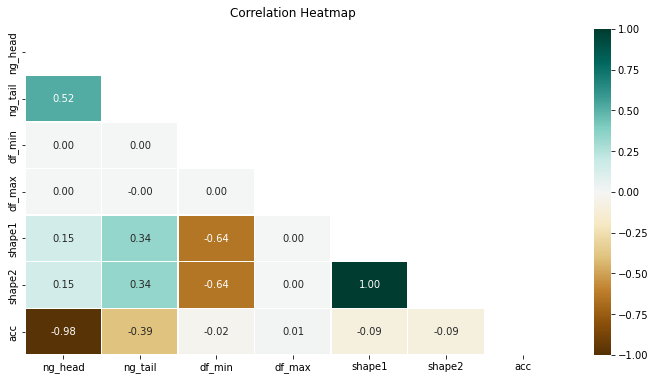

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns    

df_corr = ex_df.corr()

plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
heatmap = sns.heatmap(data = df_corr, mask=mask, fmt='.2f', vmin=-1, vmax=1, annot=True, linewidths=.5, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);